# Data Analysis of the generated images and residuals

In this notebook, the data-set is generated with lenstronomy. The aim is to show the data that will be used for the neural network and confirm if the generated data fits our expectations with simulated images.
As we deal with and absolute error on the residuals, some percentage of error are tested to make sure that the error is difficult to see with the naked eye. 
Finally the distribution of variable and labels are checked in order to make sure that our dataset building is correct.

Final configuration for the simulated images:
Lens' mass variation :
- Model : Power-law Elliptical Mass Distribution

>$\kappa = \frac{3-\gamma }{2}\left ( \frac{\theta_E}{\sqrt{q e_1^2+ e_2^2/q}} \right )^{\gamma-1}$
 
* Einstein radius: $\theta_E \in [1, 2]$

* Power law slope: $\gamma \in [1.8, 2.2]$
* Ellipsity* : $e_1 \in [-0.18, 0.18]$   and $e_2 \in [0, 0.18]$
* Center : $x = 0$ and $y = 0$

Source variation :
* Model : Sersic ellipse
* Amplitude : $amp \in [10, 24]$
* Sersic radius : $R_{sersic} \in [0.1, 0.4]$
* Sersic index : $n_{sersic} \in [0.8, 5]$
* Ellipsity* : $e_1 \in [-0.18, 0.18]$   and $e_2 \in [0, 0.18]$
* Center : $x \in [-0.5,0.5]$ and $y \in [-0.5,0.5]$

Note* : The ellipsity range is determined with the following equations, where $q\in [0.7, 1]$ and $\phi \in[0, \pi/2]$

>$e_1 = \frac{1-q}{1+q}\cos{(2\phi)}$     and     $e_2 = \frac{1-q}{1+q}\sin{(2\phi)} $
    
Acceptable percentage of error: under 5%


### 0. Import

In [1]:
import numpy as np
import pandas as pd

from helpers import*
from lenshelpers import*

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

### 1. Build the data set

The residual maps are generated and stored in the repository `data/configFile/config_model` under the name `i_lens.h5`, while the metadata is saved under the name `i_meta.h5`. The `i` stands for the type of error generated such that: 
* 1 - mass error : Only the mass parameters of the model are varying. The source model remain the same.
* 2 - source error : Only the source parameters of the model are varying. The mass model remain the same.
* 3 - mass & source error : The source and mass parameters are varying.

In [2]:
# Build the four classes 
config_repo_model = 'data/configFile/config_model'
size = 600; ratio = 0.75; percent = 0.05

for i in np.arange(1,4):
    res = Residual()
    res.build(size, i, ratio = ratio, per_error = percent)

print('Data Generation Finished')

Data Generation Finished


In [3]:
metadata = pd.DataFrame()
for i in np.arange(1,4):
    str_ID = "E"+str(i)+"P"+str(int(percent*100))+"R"+str(int(ratio*100))
    [img, meta] = read_hdf5(str_ID, path = "data/dataSet/")
    metadata = pd.concat([metadata,meta], ignore_index=True)
    if i == 1:
        final_array = img
    else:
         final_array = np.concatenate((final_array, img))
metadata ['ID'] = np.arange(0,final_array.shape[0])

print('Reading data Finished')

Reading data Finished


## 2. Plot the residual maps and simulated images

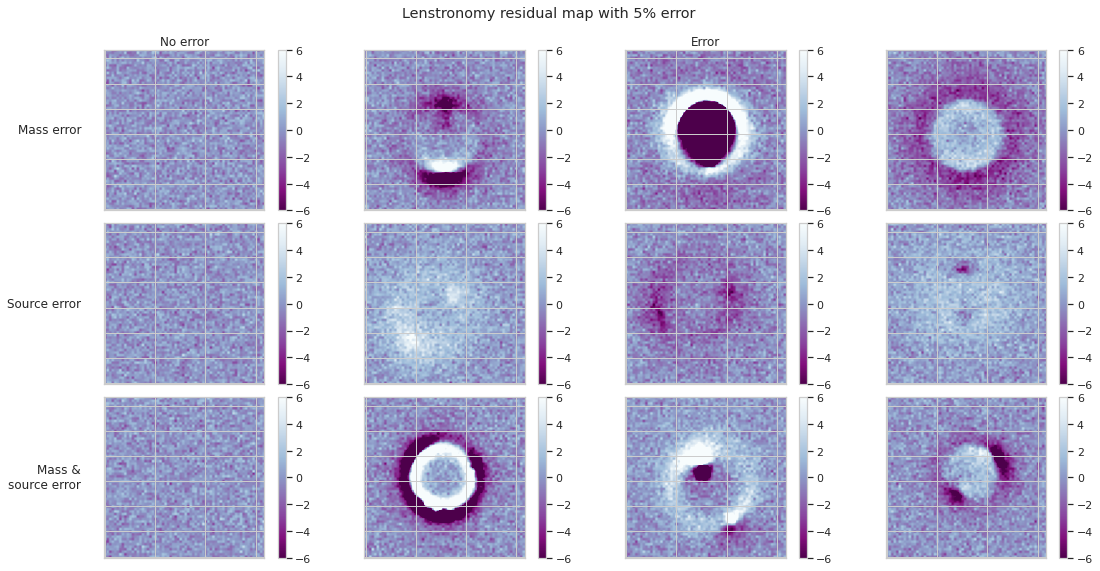

In [4]:
f, axes = plt.subplots(3, 4, figsize=(16, 8), sharex=False, sharey=False)
norm = colors.Normalize(vmin=-6, vmax=6)
a_size = int(size/3)
p_false = round(((1-ratio)*size/3))-1

for i in range(0,4):
    pos1 = axes[0,i].imshow(final_array[p_false+i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    pos2 = axes[1,i].imshow(final_array[a_size+p_false+i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    pos3 = axes[2,i].imshow(final_array[2*a_size+p_false+i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    axes[0,i].set_yticklabels([]); axes[0,i].set_xticklabels([])
    axes[1,i].set_yticklabels([]); axes[1,i].set_xticklabels([])
    axes[2,i].set_yticklabels([]); axes[2,i].set_xticklabels([])
    f.colorbar(pos1, ax=axes[0,i]); f.colorbar(pos2, ax=axes[1,i])
    f.colorbar(pos3, ax=axes[2,i])
    
pad = 5
axes[0,0].annotate('No error', xy=(0.5, 1), xytext=(0, pad),
                   xycoords='axes fraction', textcoords='offset points', ha='center', va='baseline')
axes[0,2].annotate('Error', xy=(0.5, 1), xytext=(0, pad),
                   xycoords='axes fraction', textcoords='offset points', ha='center', va='baseline')

axes[0,0].annotate('Mass error', xy=(0, 0.5), xytext=(-axes[0,0].yaxis.labelpad - pad, 0),
                   xycoords=axes[0,0].yaxis.label, textcoords='offset points', ha='right', va='center')
axes[1,0].annotate('Source error', xy=(0, 0.5), xytext=(-axes[1,0].yaxis.labelpad - pad, 0),
                   xycoords=axes[1,0].yaxis.label, textcoords='offset points', ha='right', va='center')
axes[2,0].annotate('Mass &\nsource error', xy=(0, 0.5), xytext=(-axes[2,0].yaxis.labelpad - pad, 0),
                   xycoords=axes[2,0].yaxis.label, textcoords='offset points', ha='right', va='center')

f.suptitle('Lenstronomy residual map with '+str(int(percent*100))+'% error', size = 'large')
f.tight_layout()
plt.show()

plt.show()
f.savefig('figures/'+str(int(percent*100))+'percenterror.jpeg')

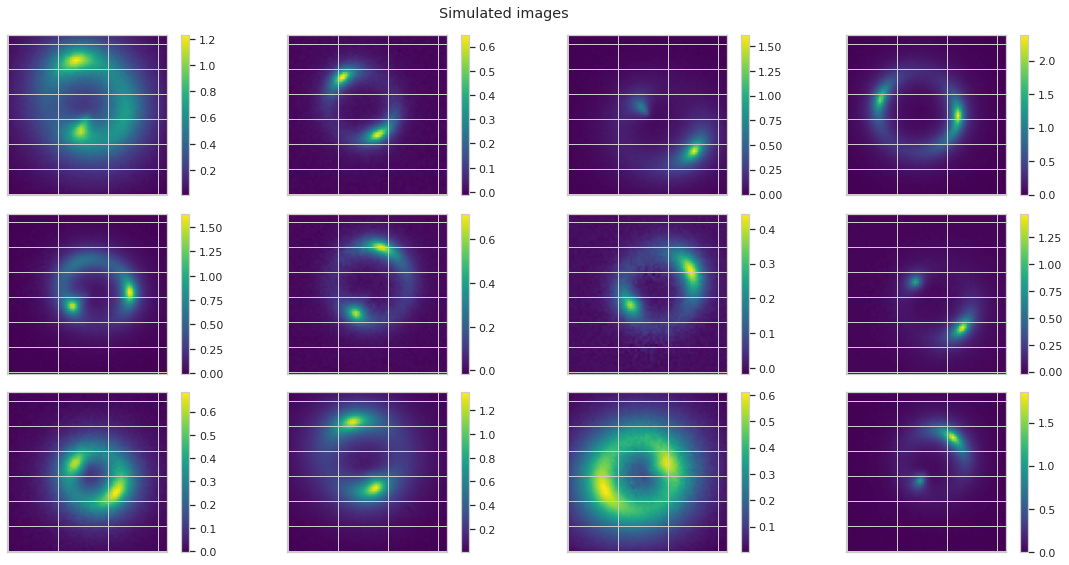

In [5]:
f, axes = plt.subplots(3, 4, figsize=(16, 8), sharex=False, sharey=False)
norm = colors.Normalize(vmin=-6, vmax=6)
dataset_model = LensDataset(size = size)
p_decal = 10

for i in range(0,4):
    image_real = dataset_model.images[i][0] + dataset_model.image_config.noise_for_model(model = dataset_model.images[i][0])
    pos1 = axes[0,i].imshow(image_real, cmap = 'viridis', origin='lower')
    image_real = dataset_model.images[p_decal+i][0] + dataset_model.image_config.noise_for_model(model = dataset_model.images[4+i][0])
    pos2 = axes[1,i].imshow(image_real, cmap = 'viridis', origin='lower')
    image_real = dataset_model.images[p_decal*2+i][0] + dataset_model.image_config.noise_for_model(model = dataset_model.images[8+i][0])
    pos3 = axes[2,i].imshow(image_real, cmap = 'viridis', origin='lower')
    axes[0,i].set_yticklabels([]); axes[0,i].set_xticklabels([])
    axes[1,i].set_yticklabels([]); axes[1,i].set_xticklabels([])
    axes[2,i].set_yticklabels([]); axes[2,i].set_xticklabels([])
    f.colorbar(pos1, ax=axes[0,i])
    f.colorbar(pos2, ax=axes[1,i])
    f.colorbar(pos3, ax=axes[2,i])

f.suptitle('Simulated images', size = 'large')
f.tight_layout()
plt.show()

plt.show()
f.savefig('figures/simulated.jpeg')

## 3. Plot data distributions

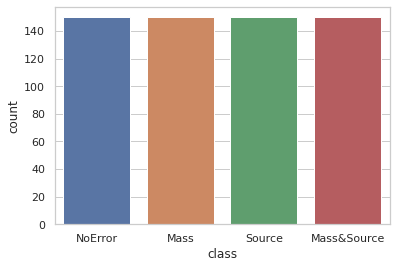

In [6]:
metadata.loc[[col == [0,0] for col in metadata['class']], 'class'] = 'NoMass'
metadata.loc[[col == [1,0] for col in metadata['class']], 'class'] = 'Mass'
metadata.loc[[col == [0,1] for col in metadata['class']], 'class'] = 'Source'
metadata.loc[[col == [1,1] for col in metadata['class']], 'class'] = 'Mass&Source'

ax = sns.countplot(metadata['class'],label="Count")
fig = ax.get_figure()

fig.savefig('figures/balancelabel.jpeg')

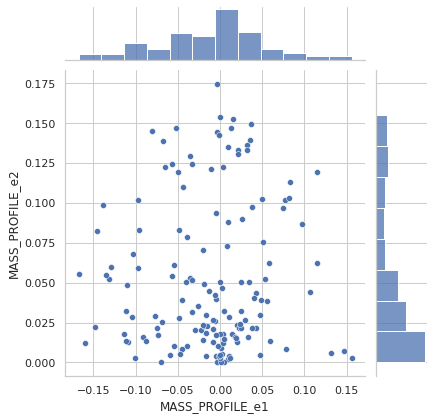

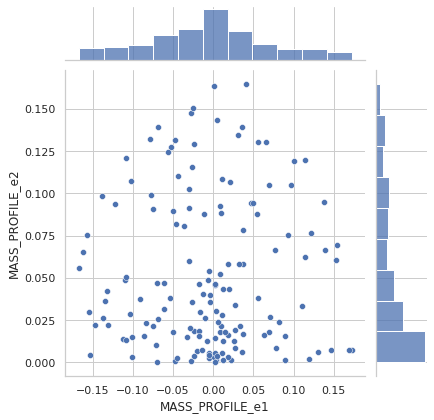

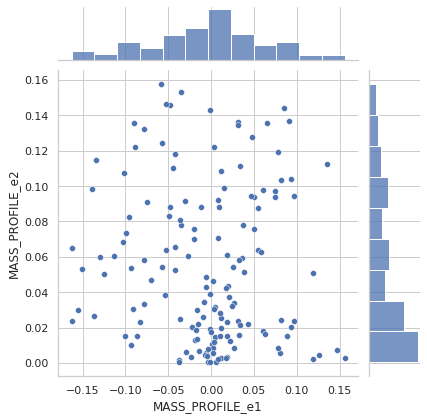

In [7]:
metadata_noerror = metadata.loc[metadata['class'] == 'NoError']
metadata_masserror = metadata.loc[metadata['class'] == 'Mass']
metadata_lighterror = metadata.loc[metadata['class'] == 'Source']
metadata_masslighterror = metadata.loc[metadata['class'] == 'Mass&Source']

sns.set_style("whitegrid")
sns.jointplot(x=metadata_lighterror['MASS_PROFILE_e1'], y=metadata_lighterror['MASS_PROFILE_e2']);

sns.set_style("whitegrid")
sns.jointplot(x=metadata_masserror['MASS_PROFILE_e1'], y=metadata_masserror['MASS_PROFILE_e2']);

sns.set_style("whitegrid")
sns.jointplot(x=metadata_masslighterror['MASS_PROFILE_e1'], y=metadata_masslighterror['MASS_PROFILE_e2']);

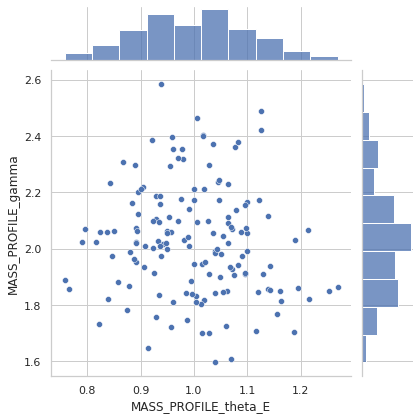

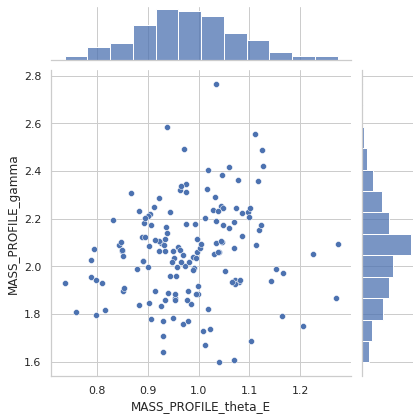

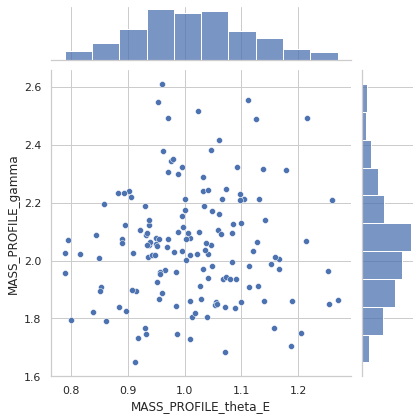

In [8]:
sns.set_style("whitegrid")
sns.jointplot(x=metadata_lighterror['MASS_PROFILE_theta_E'], y=metadata_lighterror['MASS_PROFILE_gamma']);

sns.set_style("whitegrid")
sns.jointplot(x=metadata_masserror['MASS_PROFILE_theta_E'], y=metadata_masserror['MASS_PROFILE_gamma']);

sns.set_style("whitegrid")
sns.jointplot(x=metadata_masslighterror['MASS_PROFILE_theta_E'], y=metadata_masslighterror['MASS_PROFILE_gamma']);